## Homework 2 - EDA, Regression, & You
### Your Name: Alyssa Kern

**COLLABORATED WITH:_ _ _Randy Tang _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _**

***
***
***

**Submit a PDF export of your notebook (100% PENALTY IF NO PDF IS SUBMITTED)** 

* Option 1 - File > Export Notebook to PDF
* Option 2 - File > Export Notebook to HTML (you cannot upload .html to Compass), open .html in browser, print to PDF
    - You need to use this option if you have math with `\begin{align} ... \end{align}`.

***
***
***

#### Table of Contents

- [Intuition](#Intuition)
    - [[5 Points] HoML Ch1 Q12](#[5-Points]-HoML-Ch1-Q12)
    - [[5 Points] HoML Ch1 Q17](#[5-Points]-HoML-Ch1-Q17)
* [Theory](#Theory)
    - [[20 Points] Bias-Variance Tradeoff](#[20-Points]-Bias-Variance-Tradeoff)
    - [[15 Points] Unbiased SLR Estimator](#[15-Points]-Unbiased-SLR-Estimator)
* [Application - EDA](#Application---EDA)
    - [[10 Points] Setup](#[10-Points]-Setup)
    - [[5 Points] Summary Statistics](#[5-Points]-Summary-Statistics)
    - [[10 Points] Figures](#[10-Points]-Figures)
- [Application - Regression](#Application---Regression)
    - [[10 Points] Data Prep](#[10-Points]-Data-Prep)
    - [[2 Points] Null Model](#[2-Points]-Null-Model)
    - [[4 Points] Backward Selection](#[4-Points]-Backward-Selection)
    - [[10 Points] Regularization](#[10-Points]-Regularization)
    - [[4 Points] Comparison](#[4-Points]-Comparison)



***********************************************************************************************
# Intuition
[TOP](#Homework2---EDA,-Regression,-&-You)

**Points are not awarded for correct answers**. 
Instead, points are awarded for explainations of why you are correct or why you are wrong.
You must attempt to answer the question to receive any points.
Points for intuition questions are pass/fail.

Answers such as "I am correct/wrong" or "because the textbook says so" are invalid. 
Show us you know what you are talking about: explain.

## [5 Points] HoML Ch1 Q12

What is the difference between a model parameter and a learning algorithm's hyperparameter?

A model parameter is a variable within a model that has a value that can be estimated, usually through historical training data. These are also called fitted parameters. A learning algorithm's hyperparameter is a parameter that is adjustable and must be 'tuned' for a model to perform optimally.

Why are you correct or wrong?

In Chapter 13 of our textbook, specifically page 396, it states that predicted values can be computed by the estimated moodel parameters. This defines the function/role of model parameters. In Chapter 13 page 400, the textbook says that many models have parameters that can be tuned (among other techniques) to avoid over fitting the training data. This description is defining hyperparameters.

## [5 Points] HoML Ch1 Q17

What is the purpose of the validation set?

A validation set serves the purpose of providing an unbiased evaluation of the model's fit on the training data set while tuning the model hyperparameters. 

Why are you correct or wrong?

The same reason I provided in the previous question. Chapter 13 in the textbook (page 400) states that cross-validation is one of the techniques that can be used for parameter tuning to avoid overfitting to the training data. It works by 'splitting' the training data set to simulate an out of sample prediction. 

****
# Theory
[TOP](#Homework2---EDA,-Regression,-&-You)

You firstly get to show the bias-variance tradeoff.
This is an excellent interview question, so you should know it.
The second is that the conditional expectation of the OLS estimator is the population coefficient.

**ENSURE YOUR MATH IS NOT CUT OFF IN YOUR FINAL PDF.** You cannot get points for math **_or_** explanations we cannot see.

## [20 Points] Bias-Variance Tradeoff
[TOP](#Homework2---EDA,-Regression,-&-You)

Start from $E[e_i^2]$ and explain what you are doing each step.
Points are awarded for the explanation, not the math.
If something is zero, tell me why, even if you think it is obvious.
Show me you know what you are doing.
You are welcome to drop subscripts and $(\cdot)$.

To be specific, show that
$$
\begin{align}
    E[e_i^2] & = Bias[\hat{f}(x_i)]^2 + V[\hat{f}(x_i)] + V[\epsilon_i]\\
    & = (f(x_i) - E[\hat{f}(x_i))^2 + E[(\hat{f}(x_i) - E[\hat{f}(x_i)])^2] + E[(\epsilon - E[\epsilon])^2]
\end{align}
$$

Ingredients:

1. $y_i = \hat{f}(x_i) + e_i$
2. $y_i = f(x_i) + \epsilon_i$
3. $E[f(x_i)] = f(x_i)$
4. $E[E[\hat{f}(x_i)]] = E[\hat{f}(x_i)] \neq \hat{f}(x_i)$
5. $E[\epsilon_i] = 0$
6. $V[\hat{f}(x_i)] = E[(\hat{f}(x_i) - E[\hat{f}(x_i)])^2] = E[\hat{f}(x_i)^2] - E[\hat{f}(x_i)]^2]$
7. $Cov(\hat{f}(x_i), \epsilon_i) = E[(\hat{f}(x_i) - E[\hat{f}(x_i)])(\epsilon_i - E[\epsilon_i])] = 0$ by independence of $\hat{f}$ and $\epsilon$
8. $(a + b + c) = a^2 + b^2 + c^2 + 2ab + 2ac + 2bc$

**********
Complete the following:

$$
\begin{align}
    E[e_i^2] & = E[(y - \hat{f})^2] \tag{by (1)}\\
    & = E\{[(f - E[\hat{f}]) + \epsilon + (E[\hat{f}] - \hat{f})]^2\} \tag{added zero}\\
    & = E[(f-E[\hat{f}])^2] + E[\epsilon^2] + E[(E[\hat{f}] - \hat{f})^2] +\\
    & + 2 E[(f - E[\hat{f}])\epsilon] + 2E[(f-E[\hat{f}])(E[\hat{f}]-\hat{f})] + 2E[\epsilon(E[\hat{f}]-\hat{f})] \tag{by (8)} \\
    & \vdots\\    
    & = Bias[\hat{f}]^2 + V[\epsilon] + V[\hat{f}]
\end{align}
$$

$$
\begin{align}
    E[e_i^2] & = E[(y - \hat{f})^2] \tag{by (1)}\\
    & = E\{[(f - E[\hat{f}]) + \epsilon + (E[\hat{f}] - \hat{f})]^2\} \tag{added zero}\\
    & = E[(f-E[\hat{f}])^2] + E[\epsilon^2] + E[(E[\hat{f}] - \hat{f})^2] + \\
    & 2 E[(f - E[\hat{f}])\epsilon] + 2E[(f-E[\hat{f}])(E[\hat{f}]-\hat{f})] + \\
    & 2E[\epsilon(E[\hat{f}]-\hat{f})] \tag{by (8)} \\  
    & = (f-E[\hat{f}])^2 + E[\epsilon^2] + E[(E[\hat{f}] - \hat{f})^2] + \\
    & 2(f - E[\hat{f}])E[\epsilon] + 2E[(f-E[\hat{f}])(E[\hat{f}]-\hat{f})] + \\
    & 2(E[\epsilon])E[(E[\hat{f}]-\hat{f})] \tag{by (3), simplify} \\  
    & = (f-E[\hat{f}])^2 + E[\epsilon^2] + E[(E[\hat{f}] - \hat{f})^2] + \\
    & 2E[(f-E[\hat{f}])(E[\hat{f}]-\hat{f})] \tag{by (5)} \\ 
    & = (f-E[\hat{f}])^2 + E[\epsilon^2] + E[(E[\hat{f}] - \hat{f})^2]  \tag{by (7)} \\ 
    & = Bias[\hat{f}]^2 + V[\epsilon] + V[\hat{f}] \\
\end{align}
$$

**The second line uses the FOIL method to expand the expected value function, and lines 3, 4, 5, 6, 7, and 8 simplifies this action. We take the expected value of each element and take out any constant terms we can for easier evaluation. Line 9 constructs the terms in a way that can be simplified into what we want to find ( for example, expected value of epsilon squared will be the variance of epsilon).**


## [15 Points] Unbiased SLR Estimator
[TOP](#Homework2---EDA,-Regression,-&-You)

Show $E[\hat{\beta}|X] = \beta$.

*An aside on conditional expectation:* $E[\hat{f}(x)] \neq \hat{f}(x)$*, however,* $E[\hat{f}(x)|x] = \hat{f}(x)$ *because* $\hat{f}(x)$ *is a function of* $x$.

Ingredients

1. $y_i = \alpha + x_i\beta  + \epsilon_i$
2. $\bar{y} = \alpha + \bar{x}\beta$
3. $E[h(x)|x] = h(x)$ for any function $h(x)$
4. $E[\epsilon|X] = 0$
5. $\hat{\beta} = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}$

***
Complete the following:
$$
\begin{align*}
  \hat{\beta} & = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2} \tag{by (5)}\\
  & \vdots \\
  & = \beta  \\
\end{align*}
$$

$$
\begin{align*}
  \hat{\beta} & = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2} \tag{by (5)}\\
  & E[\hat{\beta}|X] = \frac{\sum_{i=1}^n(x_i - \bar{x})E[(y_i - \bar{y})|X]}{\sum_{i=1}^n(x_i - \bar{x})^2} \tag{by (3)} \\
&  = \frac{\sum_{i=1}^n(x_i - \bar{x})(E[y_i|X] - E[\bar{y}|X])}{\sum_{i=1}^n(x_i - \bar{x})^2} \tag{Using linearity of expectation} \\
&  = \frac{\sum_{i=1}^n(x_i - \bar{x})(E[(\alpha+x_i\beta+\epsilon_i)] - E[\bar{y}|X])}{\sum_{i=1}^n(x_i - \bar{x})^2} \tag{by (1)} \\
&  = \frac{\sum_{i=1}^n(x_i - \bar{x})(E[\alpha+x_i\beta+\epsilon_i] - E[\alpha+\bar{x}\beta])}{\sum_{i=1}^n(x_i - \bar{x})^2} \tag{by (2)} \\
&  = \frac{\sum_{i=1}^n(x_i - \bar{x})(E[\alpha+x_i\beta] + E[\epsilon_i] - E[\alpha+\bar{x}\beta])}{\sum_{i=1}^n(x_i - \bar{x})^2} \tag{Simplify} \\
&  = \frac{\sum_{i=1}^n(x_i - \bar{x})(E[\alpha+x_i\beta] - E[\alpha+\bar{x}\beta])}{\sum_{i=1}^n(x_i - \bar{x})^2} \tag{by (4)} \\
&  = \frac{\sum_{i=1}^n(x_i - \bar{x})((\alpha+x_i\beta) - (\alpha+\bar{x}\beta))}{\sum_{i=1}^n(x_i - \bar{x})^2} \tag{by (3)} \\
&  = \frac{\sum_{i=1}^n(x_i - \bar{x})(\beta(x_i-\bar{x}))}{\sum_{i=1}^n(x_i - \bar{x})^2} \tag{Simplify} \\
&  = \beta(\frac{\sum_{i=1}^n(x_i - \bar{x})^2}{\sum_{i=1}^n(x_i - \bar{x})^2}) \tag{Simplify} \\
&  = \beta  \\
\end{align*}
$$

**The second line re writes beta hat as the expected value of beta hat and the yi - y bar as the conditional expected value of itself given x. This allows us to break this term down into multiple components in line 3 (expected value of yi given x and expected value of y bar given x). Line 4 re writes the expected value of yi given x as the equation it represents (alpha plus xi * beta plus epsilon). Line 5 rewrites the expected value of y bar given x as alpha plus x bar * beta. These operations and substitutions will help us cancel values. Line 6 seperates the expected value of yi given x equation into two seperate expected values, this is because we know the expected value of epsilon is zero due to Gauss Markov assumptions. In line 8, we know that the expected values of the two terms in the numerator are themselves. Since they share a common factor, beta, we combine the two componetns as one and multiply by beta. Since beta is a constant, we can take it out of the summation. Now we have a fraction of two identical values, which turns into the value one and leaves beta left.**

***********
# Application - EDA
[TOP](#Homework2---EDA,-Regression,-&-You)

*************
## [10 Points] Setup
[TOP](#Homework2---EDA,-Regression,-&-You)

In [1]:
# Here you go
import numpy as np
import pandas as pd

import statsmodels.api as sm
from scipy.stats import binned_statistic

from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.linear_model as lm

import matplotlib.pyplot as plt
import seaborn as sns

**[5 points]** Set seaborn runtine configurations (title size, axes label size, xtick label size, ytick label size, figure size) larger than default (it need not match what is used in lecture).

In [2]:
sns.set(rc = {'axes.titlesize': 30,
             'axes.labelsize': 25,
             'xtick.labelsize': 16,
             'ytick.labelsize': 16,
             'figure.figsize': (10, 5)})
sns.set_style("white") 

**[1 point]** Import the homework data using whatever name for the object you like for the object.

In [3]:
hwd = pd.read_csv('hw_data.csv')
print(hwd)

               id  county  occ2010  ind1990  l_incwage  full_time  \
0             601    1097     3600      831   9.862666          0   
1             602    1097     3640      820   9.857444          1   
2             801    1097     7810      641  10.203592          1   
3             802    1097     4720      641   9.798127          0   
4            2301    1097     6355       60  11.289782          1   
...           ...     ...      ...      ...        ...        ...   
785867  137743201   55117     5140       60   8.517193          0   
785868  137743202   55117     8740      882  11.156251          1   
785869  137743203   55117     4110      641   7.600902          0   
785870  137753101   55117      205       11   9.104980          1   
785871  137756301   55117     3410      642  10.239960          1   

              degree  l_density  experience  puma_urate     occ_ba  \
0       some college   7.695985           6    5.917822   8.586593   
1       some college   7.695985

This assignment is focused on predicting wages. 

- **[1 point]** Create dummy variables for the multiclass variable.

In [4]:
#hwd['hs_or_less'] = (hwd.degree == 'hs or less') * 1
#hwd['some_college'] = (hwd.degree == 'some college') * 1
#hwd['ba_or_more'] = (hwd.degree == 'ba or more') * 1
#del hwd['degree']
#hwd

In [5]:
hwd = hwd.join(pd.get_dummies(hwd.degree, drop_first = True))

There are three key variables which are not used in analysis.
We also no longer need the `degree` variable.

* **[2 points]** In whatever combination of your choosing, **append** to the index or **drop** these four variables
* **[1 point]** Print the bottom 3 observations

In [6]:
del hwd['county']
del hwd['occ2010']
del hwd['ind1990']
# deleted degree variable in previous section

In [7]:
hwd.iloc[-3:]

,id,l_incwage,full_time,degree,l_density,experience,puma_urate,occ_ba,ind_wage,hpi,female,any_kids,black,hispanic,hs or less,some college
785869,137743203,7.600902,0,hs or less,6.595917,0,1.312605,11.182924,16368.472721,116.19,1,0,0,0,1,0
785870,137753101,9.104980,1,some college,6.595917,21,1.312605,22.147747,22112.724019,116.19,1,1,0,0,0,1
785871,137756301,10.239960,1,hs or less,6.595917,35,1.312605,21.449707,40153.583596,116.19,1,0,0,0,1,0


***
## [5 Points] Summary Statistics 
[TOP](#Homework2---EDA,-Regression,-&-You)

**[1 point]** `.describe()` the variables.

In [8]:
hwd.describe()

,id,l_incwage,full_time,l_density,experience,puma_urate,occ_ba,ind_wage,hpi,female,any_kids,black,hispanic,hs or less,some college
count,7.858720e+05,785872.000000,785872.000000,785872.000000,785872.000000,785872.000000,785872.000000,785872.000000,785872.000000,785872.000000,785872.000000,785872.000000,785872.000000,785872.000000,785872.000000
mean,6.539035e+07,10.444697,0.810848,7.901147,21.497431,4.565357,37.408588,44485.232634,162.831250,0.485747,0.255293,0.105872,0.063462,0.293596,0.305323
std,4.131173e+07,1.121583,0.391629,1.176867,13.217047,1.908056,30.099020,20384.552774,37.044526,0.499797,0.436026,0.307674,0.243792,0.455409,0.460544
min,6.010000e+02,1.386294,0.000000,4.284965,-5.000000,0.202896,1.256932,6229.223623,83.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.608078e+07,9.903488,1.000000,7.095976,10.000000,3.280667,8.586593,28900.704927,133.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.522900e+07,10.596635,1.000000,7.972156,22.000000,4.207127,25.116683,39496.468552,161.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.023246e+08,11.156251,1.000000,8.599400,33.000000,5.479418,62.820715,58771.657159,185.250000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.377683e+08,13.478638,1.000000,11.510160,58.000000,16.784090,100.000000,112754.704290,287.230000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**[1 point]** Do any of the non-dummy variables have a mean *drastically* different than their medians?

- If yes, produce a histogram of these variables and consider a logarithm transformation. If it appears appropriate to transform them, then do so. If not, then do not transform them.
- If no, then do not produce any figures.

In [9]:
#the variable 'occ_ba' seems to have a mean drastically different than its median

#hwd.hist(column = 'occ_ba')


In [10]:
#the data for occ_ba is skewed, so I will take log transformation
hwd['occ_ba'] = np.log(hwd['occ_ba'])



- **[1 point]** Produce a correlation matrix of the data. *Hint:* `df.corr()`
- **[3 points]** What are the top three most correlated features with the label `l_incwage`?

In [11]:
corr_matrix = hwd.corr()
corr_matrix

,id,l_incwage,full_time,l_density,experience,puma_urate,occ_ba,ind_wage,hpi,female,any_kids,black,hispanic,hs or less,some college
id,1.000000,-0.001453,0.017375,-0.133726,-0.004861,-0.095330,0.006343,0.016733,-0.216648,0.000445,-0.002957,0.025661,-0.032901,-0.002212,-0.006910
l_incwage,-0.001453,1.000000,0.561254,0.012788,0.259179,-0.108746,0.407380,0.424103,0.039968,-0.163449,0.120149,-0.077464,-0.060839,-0.283170,-0.103054
full_time,0.017375,0.561254,1.000000,0.003347,0.163330,-0.023964,0.162408,0.259565,0.005690,-0.155095,0.059965,-0.007099,-0.008735,-0.085360,-0.062057
l_density,-0.133726,0.012788,0.003347,1.000000,-0.073789,0.066038,0.028919,0.011621,0.528182,0.003356,-0.032168,0.101015,0.145714,-0.013554,-0.059257
experience,-0.004861,0.259179,0.163330,-0.073789,1.000000,0.012819,-0.032896,0.077511,-0.031183,-0.011489,0.049157,0.004730,-0.021352,0.112883,0.037727
puma_urate,-0.095330,-0.108746,-0.023964,0.066038,0.012819,1.000000,-0.134519,-0.090986,-0.047324,0.015600,-0.007941,0.178590,0.033540,0.105813,0.044917
occ_ba,0.006343,0.407380,0.162408,0.028919,-0.032896,-0.134519,1.000000,0.381134,0.039025,0.147109,0.031382,-0.081489,-0.088456,-0.499002,-0.135577
ind_wage,0.016733,0.424103,0.259565,0.011621,0.077511,-0.090986,0.381134,1.000000,0.017792,-0.067388,0.045097,-0.045925,-0.052363,-0.254128,-0.051227
hpi,-0.216648,0.039968,0.005690,0.528182,-0.031183,-0.047324,0.039025,0.017792,1.000000,-0.006029,-0.004341,-0.023895,0.101590,-0.014359,-0.038892
female,0.000445,-0.163449,-0.155095,0.003356,-0.011489,0.015600,0.147109,-0.067388,-0.006029,1.000000,-0.011891,0.051469,-0.004424,-0.076299,0.029855


In [12]:
# The top 3 most correlated features with the label 'l_incwage' are:
# 1. full_time (0.561254)
# 2. ind_wage (0.424103)
# 3. occ_ba (0.407380)

***
## [10 Points] Figures
[TOP](#Homework2---EDA,-Regression,-&-You)

The Mincer equation suggests that wages are a function of education and a quadratic of experience:
$$
ln(w_i) = ln(w_0) + Ed_i \rho + Exp_i\beta_1  + Exp_I^2\beta_2 + \epsilon_i
$$

Do you find evidence of a quadratic relationship between log wages and experience?
Produce a 

- **[2 points]** binned scatter plot of log wages versus experience
- **[1 point]** with 50 bins
- **[1 point]** with axis labels
- **[1 point]** with a tite

<function matplotlib.pyplot.show(close=None, block=None)>

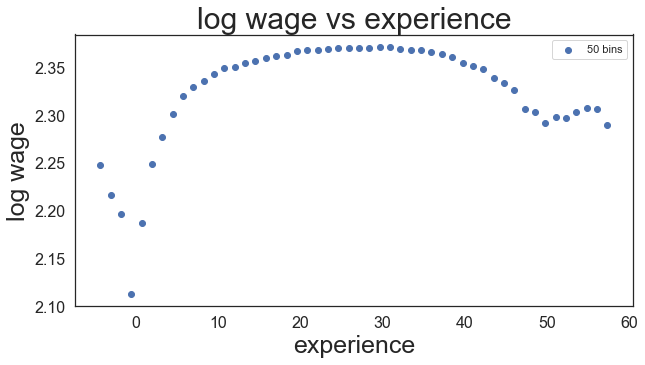

In [13]:
# Binned scatter plot
n = 50
bin_mean, bin_edge, bin_number = binned_statistic(hwd.experience, np.log(hwd.l_incwage), bins = n)

x = np.average([bin_edge[:-1], bin_edge[1:]], axis = 0)

plt.scatter(x, bin_mean, label = '%d bins' % n)
plt.xlabel('experience')
plt.ylabel('log wage')
plt.title('log wage vs experience')
plt.legend()
plt.show



**[5 point]** Do you find evidence of a quadratic relationship?

In [14]:
# By the looks of the binned scatterplot, there is evidence of a quadratic relationship.
# The data points dip up and back down, which slightly resembles a parabola

**************
# Application - Regression 
[TOP](#Homework2---EDA,-Regression,-&-You)

## [10 Points] Data Prep
[TOP](#Homework2---EDA,-Regression,-&-You)

Append to the data set

- **[3 points]** a quadratic, cubic, and quartic transformation of experience
- **[1 point]** an interaction between female and any children

In [15]:
# Quadratic

hwd['experience_quad'] = (hwd['experience'])**2

# Cubic

hwd['experience_cubic'] = (hwd['experience'])**3

# Quartic

hwd['experience_quartic'] = (hwd['experience'])**4

# Check to see it worked
hwd


,id,l_incwage,full_time,degree,l_density,experience,puma_urate,occ_ba,ind_wage,hpi,female,any_kids,black,hispanic,hs or less,some college,experience_quad,experience_cubic,experience_quartic
0,601,9.862666,0,some college,7.695985,6,5.917822,2.150202,58771.657159,124.54,0,0,0,0,0,1,36,216,1296
1,602,9.857444,1,some college,7.695985,5,5.917822,2.266533,48179.067424,124.54,1,0,0,0,0,1,25,125,625
2,801,10.203592,1,some college,7.758590,7,5.454464,1.380550,16368.472721,124.54,0,1,1,0,0,1,49,343,2401
3,802,9.798127,0,hs or less,7.758590,7,5.454464,1.945288,16368.472721,124.54,1,1,1,0,1,0,49,343,2401
4,2301,11.289782,1,hs or less,5.786897,18,3.103390,1.967492,37101.999239,124.54,0,0,1,0,1,0,324,5832,104976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785867,137743201,8.517193,0,hs or less,6.595917,34,1.312605,3.168046,37101.999239,116.19,1,1,0,0,1,0,1156,39304,1336336
785868,137743202,11.156251,1,hs or less,6.595917,30,1.312605,2.774552,70798.119241,116.19,0,1,0,0,1,0,900,27000,810000
785869,137743203,7.600902,0,hs or less,6.595917,0,1.312605,2.414388,16368.472721,116.19,1,0,0,0,1,0,0,0,0
785870,137753101,9.104980,1,some college,6.595917,21,1.312605,3.097736,22112.724019,116.19,1,1,0,0,0,1,441,9261,194481


In [16]:
hwd['female:any_kids'] = hwd.female * hwd.any_kids
hwd

,id,l_incwage,full_time,degree,l_density,experience,puma_urate,occ_ba,ind_wage,hpi,female,any_kids,black,hispanic,hs or less,some college,experience_quad,experience_cubic,experience_quartic,female:any_kids
0,601,9.862666,0,some college,7.695985,6,5.917822,2.150202,58771.657159,124.54,0,0,0,0,0,1,36,216,1296,0
1,602,9.857444,1,some college,7.695985,5,5.917822,2.266533,48179.067424,124.54,1,0,0,0,0,1,25,125,625,0
2,801,10.203592,1,some college,7.758590,7,5.454464,1.380550,16368.472721,124.54,0,1,1,0,0,1,49,343,2401,0
3,802,9.798127,0,hs or less,7.758590,7,5.454464,1.945288,16368.472721,124.54,1,1,1,0,1,0,49,343,2401,1
4,2301,11.289782,1,hs or less,5.786897,18,3.103390,1.967492,37101.999239,124.54,0,0,1,0,1,0,324,5832,104976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785867,137743201,8.517193,0,hs or less,6.595917,34,1.312605,3.168046,37101.999239,116.19,1,1,0,0,1,0,1156,39304,1336336,1
785868,137743202,11.156251,1,hs or less,6.595917,30,1.312605,2.774552,70798.119241,116.19,0,1,0,0,1,0,900,27000,810000,0
785869,137743203,7.600902,0,hs or less,6.595917,0,1.312605,2.414388,16368.472721,116.19,1,0,0,0,1,0,0,0,0,0
785870,137753101,9.104980,1,some college,6.595917,21,1.312605,3.097736,22112.724019,116.19,1,1,0,0,0,1,441,9261,194481,1


**[1 point]** Print the number of observations

In [17]:
#sum(hwd.count())

In [18]:
print(hwd.shape)  #or
print(hwd.shape[0])  #or
print(len(hwd.index))

(785872, 20)
785872
785872


We will be using the non-standardized label.

- **[1 point]** Create `x` and `y`.

Create `x_train`, `x_test`, `y_train`, `y_test` with a sample split using

- **[1 point]** a train set size of 5%
- **[1 point]** a random seed of 490

Then 

- **[1 point]** standardize `x_train` and `x_test`
- **[1 point]** add an intercept to all feature objects

In [ ]:
# Non-standardized label
# y = hwd['l_incwage']
# x = hwd.drop(columns = 'l_incwage')

# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.05, random_state = 490)

# # Standardize x_train and x_test
# x_train_std = x_train.apply(lambda x: (x - np.mean(x))/np.std(x), axis = 0)
# x_test_std  = x_test.apply(lambda x: (x - np.mean(x))/np.std(x), axis = 0)

# x_train_std = sm.add_constant(x_train_std)
# x_test_std  = sm.add_constant(x_test_std)
# x_train     = sm.add_constant(x_train)
# x_test      = sm.add_constant(x_test)

x = hwd.drop(columns = 'l_incwage')
y = hwd['l_incwage']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.05, random_state = 490)
                                                    
# Standardize x_train and x_test
x_train_std = x_train.apply(lambda x: (x - np.mean(x))/np.std(x), axis = 0)
x_test_std = x_test.apply(lambda x: (x - np.mean(x))/np.std(x), axis = 0)

x_train_std = sm.add_constant(x_train_std)
x_test_std = sm.add_constant(x_test_std)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

************
## [2 Points] Null Model 
[TOP](#Homework2---EDA,-Regression,-&-You)

- **[1 point]** Obtain the test RMSE of the null model
- **[1 point]** print the test RMSE of the null model

In [ ]:
rmse_null = np.sqrt(np.mean((y_test - np.mean(y_train))**2))
rmse_null


********
## [4 Points] Backward Selection
[TOP](#Homework2---EDA,-Regression,-&-You)

**[1 point]** Perform backward selection using the **non-standardized features** with a threshold of 0.05.

- **[1 point]** produce a summary of the selected model

In [ ]:
#backselect_model = sm.OLS(y_train, x_train).fit()
#print(backselect_model.summary2())

In [ ]:
backselect_model = sm.OLS(y_train, x_train.drop.fit())
backselect_model.summary()                          

- **[1 point]** obtain the test RMSE
- **[1 point]** print the test RMSE

In [ ]:
rmse_backward = np.sqrt(np.mean((y_test - backselect_model.predict(x_test))**2))
rmse_backward

***********
## [10 Points] Regularization
[TOP](#Homework2---EDA,-Regression,-&-You)

Identify the optimal $\alpha$ and Lasso weight on the standardized features.
- **[1 point]** Using 5-fold grid search cross-validation
- **[1 point]** Add the `%%time` magic command in the first line of the CV code chunk
- **[1 point]** use a grid over $\alpha$ by powers of 10 no smaller than $10^{-10}$
- **[1 point]** use a grid of the Lasso weight with a step size of 0.2
- **[1 point]** use a random state of 490
    - Ignore convergence warnings

In [ ]:
# %%time
# hwd_grid = {
#     'alpha': 10.0**np.arange(-9, -5, 10),
#     'l1_ratio':  np.arange(0, 1, step = 0.2)
# }

# lr_cv = lm.ElasticNet(fit_intercept = False, normalize = False, random_state = 490)
                             
# grid_search = GridSearchCV(lr_cv, hwd_grid, 
#                           cv = 5, 
#                           scoring = 'accuracy',
#                           n_jobs = 10)
# grid_search.fit(x_train_std, y_train)
# best = grid_search.best_params_
# best

In [ ]:
%%time
hwd_grid = {'alpha': 10.**np.arange(-10, -1, 1),
           'l1_ratio': np.arange(0, 1, 0.2)}

lr_cv = lm.ElasticNet(fit_intercept = False, random_state = 490)

grid_search = GridSearchCV(lr_cv, hwd_grid, 
                           cv = 5, 
                           scoring = 'neg_root_mean_squared_error',
                           n_jobs = 10)
grid_search.fit(x_train_std, y_train)
best = grid_search.best_params_
best

Using the identified optimal hyperparameters

- **[1 point]** refit the model with `statsmodels` on the standardize features
- **[1 point]** if your identified $\alpha$ was $10^{-10}$, then set $\alpha$ to zero
- **[1 point]** print the parameters
- **[1 point]** obtain the rmse
- **[1 point]** print the rmse

In [ ]:
#lasso = sm.OLS(y_train, x_train_std).fit_regularized(alpha = best['alpha'], L1_wt = 0.2)
#print(lasso.params)

In [ ]:
lasso = sm.OLS(y_train, x_train_std).fit()
print(lasso.params)

In [ ]:
rmse_lasso = np.sqrt(np.mean((y_test - lasso.predict(x_test_std))**2))
rmse_lasso

From here, you should realize that neither backward selection nor regularization have reduced the number of features. 
I won't ask you to refit using "selected" variables to avoid the redundancy.

**********
## [4 Points] Comparison
[TOP](#Homework2---EDA,-Regression,-&-You)

**[2 points]** Obtain the percent decrease in RMSE for each model relative to the null model. **DO NOT PRINT THEM**.

In [ ]:
# Backward Selection Model
perc_dec_backward = (((rmse_backward - rmse_null)/ rmse_null) *100)

In [ ]:
# Lasso Model
perc_dec_lasso = (((rmse_lasso - rmse_null)/ rmse_null) *100)

Using one `print()` statement, print the

- **[1 point]** percent improvement of each model round to two basis points
- **[1 point]** a new line for each model's RMSE

In [ ]:
#print(round(perc_dec_backward, 2))
#print(round(perc_dec_lasso, 2))

In [ ]:
print('Backward Selection RMSE: %.2f\nRegularization RMSE: %.2f' % (perc_dec_backward, perc_dec_lasso))